In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Outline 

* sklearn 
    * StandardScaler
    * Train-test split and K-fold cross validation
    * One-hot Encoder
    * Multivariate linear regression
* Q&A on HW3

## Normalize your dataset using sklearn

In [2]:
import pandas as pd
data=pd.read_csv("wines.csv")
data.head()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1


In HW2, we normalize our data by our own code. This is how I did it:

In [3]:
df=data
feats=df.drop(['Start assignment','ranking'],axis=1)
rankings=df['ranking']
avg=np.average(feats,axis=0)
std=np.std(feats,axis=0)
feats=feats-avg
feats=feats/std
feats

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
2,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
3,1.382733,-0.768712,-0.170035,-0.809251,-0.332922,-0.152402,0.402320,-0.820719,-0.036617,-0.025128,0.932531,0.294232,1.697675
4,0.925685,-0.544297,0.158946,-1.049479,-0.754202,0.488531,0.733629,-0.578985,0.383884,0.234414,0.844785,0.407228,1.825055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.493343,2.031997,1.803849,1.653086,0.860705,-0.504914,-1.073511,-0.740141,-0.842575,1.488867,-1.261138,-0.976966,-0.372246
174,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
175,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
176,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


But we can also do it through the sklearn package using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) funtion

In [6]:
from sklearn.preprocessing import StandardScaler

x=data.drop(["Start assignment","ranking"],axis=1).values
y=data['ranking'].values




/opt/anaconda3/envs/msse-python/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
x_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.29570023,  0.22769377,  1.84040254, ...,  0.36217728,
         0.44960118, -0.03787401],
       [ 2.25977152, -0.62508622, -0.7183361 , ...,  0.53767082,
         0.33660575,  0.94931905],
       ...,
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041],
       [-0.92721209, -0.54429654, -0.90110314, ...,  0.18668373,
         0.78858745, -0.7543851 ]])

## Train-test split and K-fold cross validation
Documentation for [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)<br>
Split our dataset into train and test

In [10]:
import sklearn.model_selection as skl_model
train_feat,test_feat,train_ranking,test_ranking=skl_model.train_test_split(x_norm, y, test_size = 36)

In [11]:
print(f'{len(train_ranking)} wines for training and {len(test_ranking)} for testing')

142 wines for training and 36 for testing


Documentation on [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [12]:
kf = skl_model.KFold(n_splits = 3, shuffle = True)
kf

KFold(n_splits=3, random_state=None, shuffle=True)

In [15]:
for train_index, test_index in kf.split(x_norm):
    print('Train: ', train_index, 'Test: ', test_index)
    x_train, x_test = x_norm[train_index], x_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

Train:  [  1   5   6   7   8   9  10  12  13  15  17  18  19  21  22  23  25  26
  28  30  31  32  35  36  37  38  42  43  44  45  46  48  50  53  54  56
  57  58  59  62  66  68  70  71  72  74  75  76  77  79  80  81  82  83
  84  85  86  87  91  92  94  96  97  98  99 100 101 102 103 104 105 107
 108 110 111 112 113 115 118 119 120 122 124 125 126 127 129 130 131 132
 133 136 138 140 142 143 147 148 149 151 152 153 155 156 158 160 161 163
 164 165 166 168 169 170 171 172 174 176] Test:  [  0   2   3   4  11  14  16  20  24  27  29  33  34  39  40  41  47  49
  51  52  55  60  61  63  64  65  67  69  73  78  88  89  90  93  95 106
 109 114 116 117 121 123 128 134 135 137 139 141 144 145 146 150 154 157
 159 162 167 173 175 177]
Train:  [  0   2   3   4   7   8   9  10  11  14  16  17  20  21  22  23  24  25
  26  27  29  32  33  34  35  36  38  39  40  41  44  45  47  48  49  51
  52  53  54  55  58  59  60  61  63  64  65  66  67  69  71  72  73  74
  76  77  78  79  80  87  88  89 

Framework for doing K-fold cross validation

In [ ]:
def Kfold(k,Xs,ys):
    
    """
    k: the fold of interest 
    Xs: 
    ys: 
    """
    # The total number of examples for training the network
    total_num=len(Xs)
    # Built in K-fold function in Sci-Kit Learn
    kf=skl_model.KFold(n_splits=k,shuffle=True)
    
    # kf.split: Generate indices to split data into training and test set.
    for train_selector,test_selector in kf.split(range(total_num)):
        # Decite training examples and testing examples for this fold
        train_Xs=Xs[train_selector] #(n, d) number of data , dimension
        test_Xs=Xs[test_selector]
        train_ys=ys[train_selector]
        test_ys=ys[test_selector]
        
        val_array=[]
        # Split training examples further into training and validation
        train_in,val_in,train_real,val_real=skl_model.train_test_split(train_Xs,train_ys)
        
        # Fit the data to your model
        # Train the model on your data
        ...
#         model = LinearRegression()
#         model.init()
        for _ in range(max_epoch):
            # Train model on a number of epochs, and test performance in the validation set
            ...
#             train_error = model.fit(train_in)
#             model.update()
#             val_error = model(val_in)
#             val_array.append(val.error)
            
#         best_idx = np.argmin(val_array)
            


        # Report result for the fold with minimum error in validation set
        train_error=model.evaluate(train_Xs,train_ys)
        test_error=model.evaluate(test_Xs,test_ys)
        print("Train error:",train_error)
        print("Test error:",test_error)
        

L. Prechelt, "Early Stopping -- but when?", Neural Networks: Tricks of the trade. Springer, Berlin, Heidelberg, 1998. 55-69.
[Link](https://link.springer.com/content/pdf/10.1007%2F978-3-642-35289-8_5.pdf)

## One hot Encoder

Let's pretend for a  minute that in our wine dataset ranks and start assignments are not labels but 2 categorical features, and we want to use one-hot encoders to describe them 

Split the features into categorical features and continuous features, 

In [16]:
categorical_feats=df[['Start assignment','ranking']]
continuous_feats=x_norm

Use [one-hot encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to transform the categorical features

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(categorical_feats)
input_cate_feats= encoder.transform(categorical_feats).toarray()
input_cate_feats

array([[1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.]])

Then you can stack categorical and continuous features together for prediction

In [21]:
# horizontal stack 
feats = np.hstack((continuous_feats, input_cate_feats)) #[  ] [] = [   ]
feats.shape

(178, 19)

Similarly, we can use one-hot encoders to encode the output

In [22]:
output_encoder=OneHotEncoder()
y = np.array(df['ranking']).reshape(-1,1)
output_encoder.fit(y)
print(output_encoder.transform(y).toarray())

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

Then we can decode the prediction

In [23]:
output_encoder.inverse_transform([[0, 1, 0]])

array([[2]])

In [ ]:
np.random.random

## Multivariate linear regression

Let's try regression of function
$$f(x,y)=3x+2y-5$$

In [24]:
def generate_X(number):
    xs=(np.random.random(number)*2-1)*10
    ys=(np.random.random(number)*2-1)*10
    return np.hstack([xs.reshape(-1,1),ys.reshape(-1,1)])
    
def generate_data(number,stochascity=0.05):
    X=generate_X(number)
    xs=X[:,0]
    ys=X[:,1]
    fs=3*xs+2*ys-5
    stochastic_ratio=(np.random.random(number)*2-1)*stochascity+1
    return X,fs*stochastic_ratio

<IPython.core.display.Javascript object>


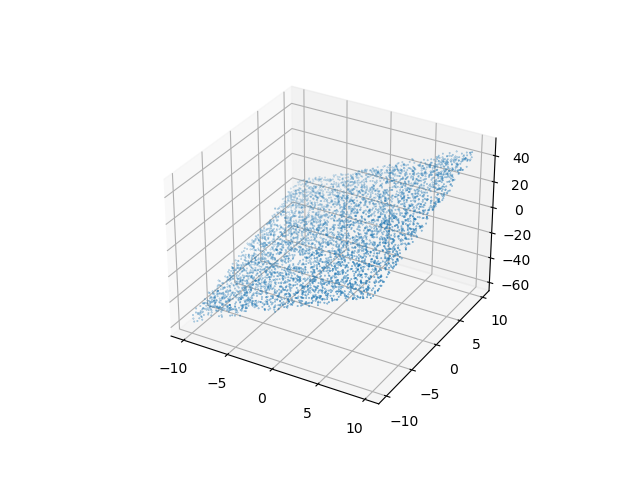

<ipython-input-25-ae7b5b3ebb27>:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


In [25]:
%matplotlib widget
x,y=generate_data(5000,0.1)
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x[:,0],x[:,1],y,s=0.1)

In [26]:
from sklearn.linear_model import LinearRegression
X,y=generate_data(1000)
reg=LinearRegression().fit(X,y)
print(reg.score(X,y))
print(reg.coef_,reg.intercept_)

0.9990759087484017
[3.00367856 1.99838584] -4.991388143958841


<IPython.core.display.Javascript object>


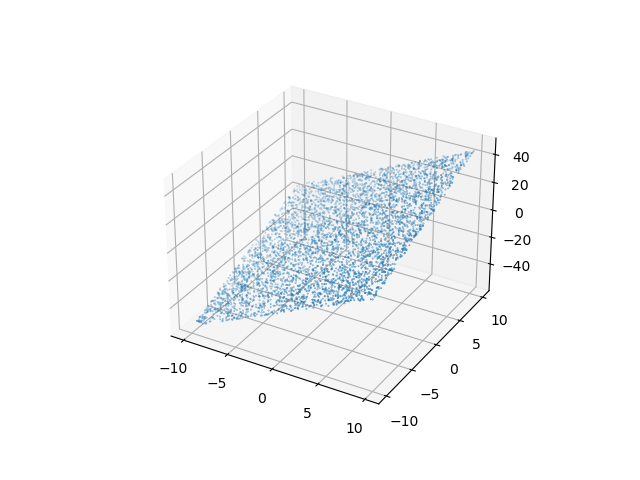

<ipython-input-27-ff937efa93cc>:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


In [27]:
X=generate_X(5000)
y=reg.predict(X)
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(X[:,0],X[:,1],y,s=0.1)